In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as msno # display missing data

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments
%matplotlib inline

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Matplotlib Version : 3.4.3
Seaborn Version : 0.11.2
/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


# Coloumn Description

* **Suburb** - Suburb

* **Address** - Address

* **Rooms** - Number of rooms

* **Price** - Price in Australian dollars

**Method** - 
    
    S - property sold;
    SP - property sold prior;
    PI - property passed in;
    PN - sold prior not disclosed;
    SN - sold not disclosed;
    NB - no bid;
    VB - vendor bid;
    W - withdrawn prior to auction;
    SA - sold after auction;
    SS - sold after auction price not disclosed.
    N/A - price or highest bid not available.

**Type** -

    br - bedroom(s);
    h - house,cottage,villa, semi,terrace;
    u - unit, duplex;
    t - townhouse;
    dev site - development site;
    o res - other residential.

* **SellerG** - Real Estate Agent

* **Date** - Date sold

* **Distance** - Distance from CBD in Kilometres

* **Regionname** - General Region (West, North West, North, North east …etc)

* **Propertycount** - Number of properties that exist in the suburb.

* **Bedroom2** - Scraped # of Bedrooms (from different source)

* **Bathroom** - Number of Bathrooms

* **Car** - Number of carspots

* **Landsize** - Land Size in Metres

* **BuildingArea** - Building Size in Metres

* **YearBuilt** - Year the house was built

* **CouncilArea** - Governing council for the area

* **Lattitude** - Self explanitory

* **Longtitude** - Self explanitory

# 1. Understand the dataset

* **Number of rows/entries** - 34857 entries, 0 to 34856

* **Data columns** (total 21 columns):

*   **Numerical** (13 columns)
 *    float64 (12 columns) - 
    'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
    'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
    'Propertycount'

 *    int64 (1 column) - 'Rooms'

* **Nominal/Categorical** (8 columns)
 *     object (8 columns) - 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'
 
 
Price, Distance, Landsize, BuildingArea, YearBuilt, Rooms

In [2]:
# show the current working directory
%pwd 

'/kaggle/working'

In [3]:
# ???
%ls kaggle/working/

ls: cannot access 'kaggle/working/': No such file or directory


In [4]:
df = pd.read_csv('/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv')
df.shape # 34857 rows, 21 columns

(34857, 21)

In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [15]:
# Statistical Summary
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [21]:
# Summary of object features
# df.describe(include = 'object')
df.describe(include = [np.object])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


In [30]:
len(set(df['Suburb']))

351

In [39]:
# SELECT h FROM Type
df_type_h = df.loc[df['Type'] == 'h']
df_type_h.shape # 23980, 21

(23980, 21)

In [45]:
# the number of values that each unique value has
df['Type'].value_counts()
df['Price'].value_counts().head(10)

1100000.0    235
600000.0     235
650000.0     219
800000.0     217
1300000.0    210
1000000.0    205
1200000.0    204
700000.0     197
750000.0     194
900000.0     191
Name: Price, dtype: int64

There are not many empty values in **cat_cols**, but there are a lot of empty values in **num_cols**.

In [11]:
print(df.isnull().sum())
print('')
print(df.isnull().sum()/len(df))

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
CouncilArea      0.000086
Lattitude        0.228821
Longtitude       0.228821
Regionnam

<AxesSubplot:>

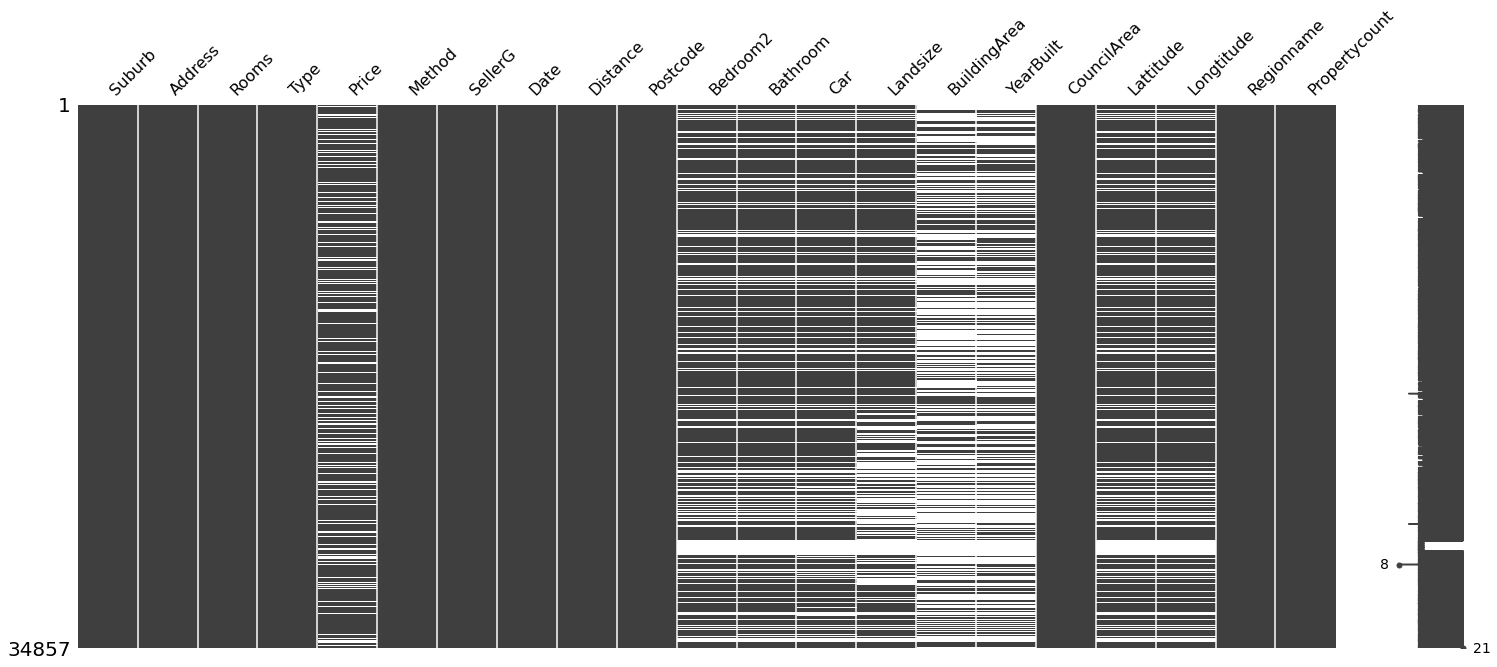

In [12]:
msno.matrix(df)

In [13]:
# Change the type of data
# df['YearBuilt'].astype(str)
# df['YearBuilt'] = df['YearBuilt'].fillna(0).astype(int)
# df['YearBuilt'].replace(0, 'nan')
df['YearBuilt'].astype(str).str[:4]

0         nan
1         nan
2        1900
3         nan
4        1900
         ... 
34852     nan
34853    2018
34854    2000
34855     nan
34856    1930
Name: YearBuilt, Length: 34857, dtype: object

In [27]:
# Change BuiltYear's type of data from float into object
df['YearBuilt'] = df['YearBuilt'].astype(float)
df['YearBuilt'].fillna(0, inplace = True)
df['YearBuilt'].astype(int)
df['YearBuilt'].replace(0, 'nan', inplace = True)
pd.to_numeric(df['YearBuilt'], errors='coerce') # coerce -> change empty values to NaN

0           NaN
1           NaN
2        1900.0
3           NaN
4        1900.0
          ...  
34852       NaN
34853    2018.0
34854    2000.0
34855       NaN
34856    1930.0
Name: YearBuilt, Length: 34857, dtype: float64

In [ ]:
# Columns that are object
num_cols = df.select_dtypes(include = ['object'])
num_cols

In [ ]:
# Columns that are not object
num_cols = df.select_dtypes(exclude = ['object'])
num_cols

### Categorical Features

In [ ]:
print(cat_cols['CouncilArea'].mode())
print('')
print(cat_cols['Regionname'].mode())

In [ ]:
# Not working. Why?
# cat_cols.fillna(cat_cols.mode(), inplace = True)
# cat_cols['CouncilArea'].fillna(cat_cols['CouncilArea'].mode(), inplace = True)
# cat_cols['Regionname'].fillna(cat_cols['Regionname'].mode(), inplace = True)

cat_cols.dropna(axis = 0, subset = ['CouncilArea','Regionname'], inplace = True)
cat_cols.isnull().sum()
len(cat_cols)

### Numerical Features
I suppose Landsie, BuildingArea, YearBuilt are quite related to Price, but there are too many missing values, especially in BuildingArea (0.475973%) and YearBuilt (0.435006%). 


In [ ]:
# Show empty values in each numerical column
print(num_cols.isnull().sum())
print("")
print(num_cols.isnull().sum()/len(df))
print("")
# num_empty = num_cols.isnull().sum()/len(df)
# num_empty[num_empty>0.5]


There are four features whose correlations with Price are above 40%: Rooms, Bedroom2, Bathroom, and BuildingArea. 

Remove Postcode, Lattitude, Longtitude, Propertycount

In [ ]:
num_cols.drop(columns = ['Postcode', 'Lattitude', 'Longtitude', 'Propertycount'], inplace = True)

In [ ]:
print(num_cols.corr())
sns.heatmap(num_cols.corr())

In [ ]:
# Drop rows with empty values 
num_cols.dropna(axis = 0, subset = ['Price', 'Landsize', 'BuildingArea', 'YearBuilt'], inplace = True)
print(num_cols.isnull().sum())
print("")
print(num_cols.isnull().sum()/len(df))

In [ ]:
num_cols.dropna(axis = 0, subset = ['BuildingArea', 'YearBuilt'], inplace = True)

In [ ]:
# Fill the missing values with mean

# a = num_cols.copy()

# a['Car'].fillna(int(a['Car'].mean()), inplace = True) 
# a['Lattitude'].fillna(round(a['Lattitude'].mean(), 5), inplace = True)
# a['Longtitude'].fillna(round(a['Longtitude'].mean(), 5), inplace = True)

num_cols['Car'].fillna(int(num_cols['Car'].mean()), inplace = True) 
num_cols['Lattitude'].fillna(round(num_cols['Lattitude'].mean(), 5), inplace = True)
num_cols['Longtitude'].fillna(round(num_cols['Longtitude'].mean(), 5), inplace = True)

print(num_cols.isnull().sum())
print("")
print(len(num_cols)) # 9028

In [ ]:
# Drop BuildingArea and YearBuilt as there are too many empty values in both columns



In [ ]:
num_bath = num_cols['Bathroom'].convert_dtypes(int)
num_bath = set(num_bath) # remove duplicates and sort and leave unique/distinct values only
num_bath = list(num_bath) # convert to a list
num_bath

In [ ]:
selected_num_cols = num_cols.copy()
selected_num_cols = selected_num_cols[['Price', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Rooms']]

selected_num_cols.dropna(axis = 0, subset=['Price'], inplace = True)
selected_num_cols.drop(columns=['YearBuilt', 'BuildingArea'], inplace = True)

print(selected_num_cols.isnull().sum())
print('')
print(selected_num_cols.isnull().sum()/len(df))
print(len(selected_num_cols)) #27247

In [ ]:
selected_num_cols

# Visualisation

Set dpi (Dots per Inch) as the default resolution of matplotlib is low

In [ ]:
for i in selected_num_cols:
    plt.hist(selected_num_cols[i])
    plt.title(i)
    plt.show()

In [ ]:
# Correlation
num_corr = selected_num_cols.corr()
# print(num_corr[selected_num_cols>0.5])
print(num_corr)
sns.heatmap(num_corr)

In [ ]:
selected_num_cols

pd.pivot_table(selected_num_cols, index = 'Price', values = ['Distance', 'Landsize', 'Rooms'])

In [ ]:
# for i in cat_cols:
#     sns.barplot(cat_cols[i].value_counts().index, cat_cols[i].value_counts()).set_title(i)
#     plt.show()
selected_cat_cols = cat_cols.copy()
selected_cat_cols.drop(columns = ['Address', 'SellerG'], inplace = True)
selected_cat_cols

for i in selected_cat_cols:
    sns.barplot(selected_cat_cols[i].value_counts().index, selected_cat_cols[i].value_counts()).set_title(i)
    plt.show()
    
# len(set(cat_cols['Suburb'])) # 351
# len(set(cat_cols['Address'])) # 34009
# len(set(cat_cols['Type'])) # 3 h, t, u
# len(set(cat_cols['Method'])) # 9
# len(set(cat_cols['CouncilArea'])) # 34
# len(set(cat_cols['Regionname'])) # 9


In [ ]:
# normal distribution?
# positive/right skwness - outliers lying on the right side

# sns.distplot(df['Price']) # distplot - displot or histplot
sns.histplot(df['Price'])
plt.ticklabel_format(style='plain', useOffset=False)
# plt.ticklabel_format(style='plain', axis='x',useOffset=False)

In [ ]:
sns.displot(df['Price'])
plt.ticklabel_format(style='plain', useOffset=False)

In [ ]:
print(df['Price'].mean())
print(df['Price'].median())
print(df['Price'].mode())


In [ ]:
# Price and categorical features with box plots
var = selected_cat_cols.copy()
feature = 'Price'

for i in selected_cat_cols:
    data = pd.concat([df[feature], df[i]], axis=1)
    f, ax = plt.subplots(figsize=(20, 6))
    fig = sns.boxplot(x=i, y=feature, data=data)
    fig.axis(ymin=0, ymax=10000000);


In [ ]:
# Price and numerical features with scatter plots
var = num_cols.copy()

for i in num_cols:
    data = pd.concat([df[var_a], df[i]], axis = 1)
    data.plot.scatter(x = var_a, y = i)
    plt.ticklabel_format(style = 'plain')
    

In [ ]:
num_cols